### Chaos & Complex Systems
# 01. Introduction 

---

In [15]:
using Pkg
Pkg.activate("../..")
using Plots, Distributions, Statistics, LinearAlgebra
steps = 1000

  Activating project at `~/Documents/STUDY/Bsc/ComplexSystems/blog/JuliaChaos`


1000

## What is a complex system?

Chaos theory is a branch of mathematics that studies the behavior of dynamic systems that are highly sensitive to initial conditions, often referred to as the butterfly effect. This means that small differences in initial conditions can lead to drastically different outcomes over time.

In this context, a complex system is one that is sensitive to initial conditions and exhibits deterministic chaos. This means that even though the system is made up of many interconnected parts, it can still behave in seemingly random ways.

One of the key characteristics of complex systems is their ability to exhibit emergent behavior, which is behavior that arises from the interactions of the system's parts but cannot be predicted by studying those parts in isolation. For example, the behavior of an ecosystem cannot be predicted by studying the individual plants and animals within it, but emerges from the interactions between those plants and animals.

After Newton wrote a first form of the gravitational interaction, two body systems were pretty well understood, it reads something like this:

In [16]:
# Simple function to compute the force vector
function force(m1, m2, x1, x2)
    return -m1 * m2 * (x1 - x2) / norm(x1 - x2)^3
end

# Integration strategy... simple euler method
function euler_step(x, v, a, dt)
    v .+= a * dt
    x .+= v * dt
    return x
end


euler_step (generic function with 1 method)

In [17]:
# Parameters
m1 = 1.0
m2 = 1.0
v1 = [0.0, -0.2]
v2 = [0.0, 0.2]
x1 = [2., 0.0]
x2 = [-2., 0.0]
# Simulation
poss_1 = Vector{Array{Float64}}(undef, steps)
poss_2 = Vector{Array{Float64}}(undef, steps)

for i in 1:steps
    a1, a2 = force(m1, m2, x1, x2) / m1, force(m2, m1, x2, x1) / m2
    x1, x2 = euler_step(x1, v1, a1, 0.1), euler_step(x2, v2, a2, 0.1)
    poss_1[i] = copy(x1)
    poss_2[i] = copy(x2)
end
poss_1 = mapreduce(permutedims, vcat, poss_1)
poss_2 = mapreduce(permutedims, vcat, poss_2);

┌ Info: Saved animation to /tmp/jl_0hEdEJyLKf.gif
└ @ Plots /home/jose/.julia/packages/Plots/M4dfL/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_0hEdEJyLKf.gif")
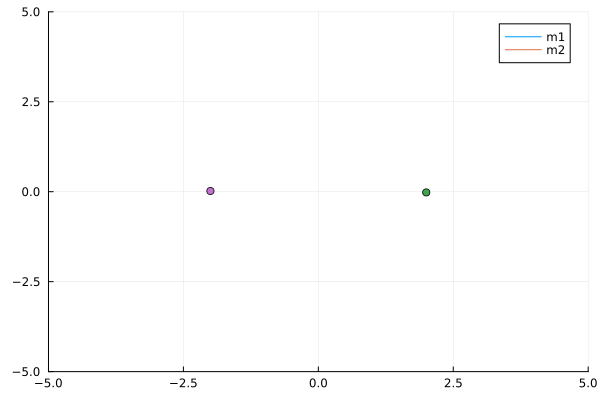

In [18]:
@gif for i in 1:steps
    plot(poss_1[1:i,1], poss_1[1:i,2], label="m1", xlims=(-5,5), ylims=(-5,5))
    plot!(poss_2[1:i,1], poss_2[1:i,2], label="m2", xlims=(-5,5), ylims=(-5,5))
    scatter!([poss_1[i,1]], [poss_1[i,2]], label="", xlims=(-5,5), ylims=(-5,5))
    scatter!([poss_2[i,1]], [poss_2[i,2]], label="", xlims=(-5,5), ylims=(-5,5))
end

But when he tried to extend this to three body systems, he found that the equations were too complex to solve. He was not able to predict the future of the system. This is the origin of the term "complex systems".


In [24]:
function tree_body(perturbation; steps=1000)
    # Parameters
    m1 = 1.0
    m2 = 1.0
    m3 = 1.0
    v1 = [0.0, -0.25 + perturbation]
    v2 = [0.0, 0.2 + perturbation]
    v3 = [-0.6 + perturbation, 0.]
    x1 = [2., 0.0]
    x2 = [-2., 0.0]
    x3 = [3.0, 2.0]
    # Simulation
    poss_1 = Vector{Array{Float64}}(undef, steps)
    poss_2 = Vector{Array{Float64}}(undef, steps)
    poss_3 = Vector{Array{Float64}}(undef, steps)

    for i in 1:steps
        a1 = (force(m1, m2, x1, x2) + force(m1, m3, x1, x3)) / m1
        a2 = (force(m2, m1, x2, x1) + force(m2, m3, x2, x3)) / m2
        a3 = (force(m3, m1, x3, x1) + force(m3, m2, x3, x2)) / m3
        x1, x2, x3 = euler_step(x1, v1, a1, 0.1), euler_step(x2, v2, a2, 0.1), euler_step(x3, v3, a3, 0.1)
        poss_1[i] = copy(x1)
        poss_2[i] = copy(x2)
        poss_3[i] = copy(x3)
    end
    poss_1 = mapreduce(permutedims, vcat, poss_1)
    poss_2 = mapreduce(permutedims, vcat, poss_2)
    poss_3 = mapreduce(permutedims, vcat, poss_3)

    return poss_1, poss_2, poss_3
end;

In [25]:
poss_1, poss_2, poss_3 = tree_body(0.)
poss_1_1, poss_2_1, poss_3_1 = tree_body(1e-3)
poss_1_2, poss_2_2, poss_3_2 = tree_body(1e-2);

┌ Info: Saved animation to /tmp/jl_0LSlWRULGP.gif
└ @ Plots /home/jose/.julia/packages/Plots/M4dfL/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_0LSlWRULGP.gif")
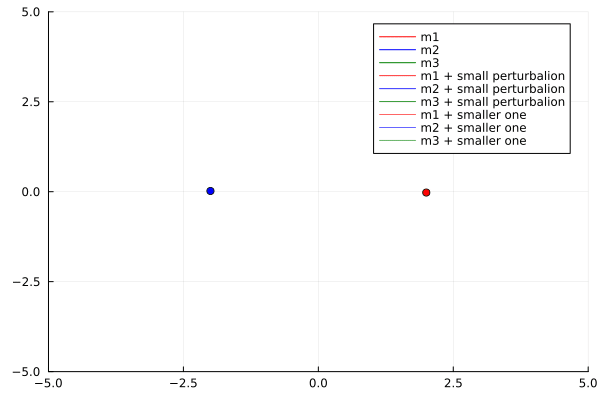

In [26]:
@gif for i in 1:200
    # Running the simulation
    # Plotting the unperturbed case
    plot(poss_1[1:i,1], poss_1[1:i,2], label="m1", xlims=(-5,5), ylims=(-5,5),  linecolor=:red)
    plot!(poss_2[1:i,1], poss_2[1:i,2], label="m2", xlims=(-5,5), ylims=(-5,5), linecolor=:blue)
    plot!(poss_3[1:i,1], poss_3[1:i,2], label="m3", xlims=(-5,5), ylims=(-5,5), linecolor=:green)
    scatter!([poss_1[i,1]], [poss_1[i,2]], label="", xlims=(-5,5), ylims=(-5,5), markercolor=:red)
    scatter!([poss_2[i,1]], [poss_2[i,2]], label="", xlims=(-5,5), ylims=(-5,5), markercolor=:blue)
    scatter!([poss_3[i,1]], [poss_3[i,2]], label="", xlims=(-5,5), ylims=(-5,5), markercolor=:green)
    # Plotting the perturbed case
    plot!(poss_1_1[1:i,1], poss_1_1[1:i,2], label="m1 + small perturbalion", xlims=(-5,5), ylims=(-5,5),linealpha=0.8, linecolor=:red)
    plot!(poss_2_1[1:i,1], poss_2_1[1:i,2], label="m2 + small perturbalion", xlims=(-5,5), ylims=(-5,5),linealpha=0.8, linecolor=:blue)
    plot!(poss_3_1[1:i,1], poss_3_1[1:i,2], label="m3 + small perturbalion", xlims=(-5,5), ylims=(-5,5),linealpha=0.8, linecolor=:green)
    # Another perturbed axample
    plot!(poss_1_2[1:i,1], poss_1_2[1:i,2], label="m1 + smaller one", xlims=(-5,5), ylims=(-5,5),linealpha=0.6, linecolor=:red)
    plot!(poss_2_2[1:i,1], poss_2_2[1:i,2], label="m2 + smaller one", xlims=(-5,5), ylims=(-5,5),linealpha=0.6, linecolor=:blue)
    plot!(poss_3_2[1:i,1], poss_3_2[1:i,2], label="m3 + smaller one", xlims=(-5,5), ylims=(-5,5),linealpha=0.6, linecolor=:green)
end

Chaos theory has its origins in the work of Henri Poincaré, a French mathematician and physicist, who studied this type of three-body problems in celestial mechanics in the late 19th century. He discovered that there can be orbits in the problem that are extremely sensitive to the initial conditions... as we see in the animation above and which are now known as chaotic orbits, and that the orbits can be chaotic even if the initial conditions are very close to each other, as we see in out animation above.

However, it wasn't until the mid-20th century that chaos theory really began to take shape as a distinct field of study. In the 1960s, American mathematician Edward Lorenz developed a simplified mathematical model for atmospheric convection, which he used to study weather patterns. In the course of his work, he discovered that small changes in the initial conditions of his model could lead to vastly different weather patterns. This discovery, known as the butterfly effect, is one of the most famous examples of chaos theory.

Since the discovery of the butterfly effect, chaos theory has been used to study a wide range of phenomena, including the behavior of fluid dynamics, population dynamics, and even the stock market. In fact, the applications of chaos theory are virtually limitless, as it can be used to understand the behavior of any system that is sensitive to initial conditions.

One of the key insights of chaos theory is the concept of deterministic chaos, which refers to the idea that even though a system may be deterministic (meaning that its future behavior can be predicted based on its current state and the laws that govern it), the behavior of the system may still be highly unpredictable. This is because the sensitivity to initial conditions can cause the system to behave in seemingly random ways.

Another important concept in chaos theory is the idea of self-similarity, which refers to the idea that the same patterns or structures can appear at different scales within a system. This is often visualized using the Mandelbrot set, a mathematical object that displays self-similarity on an infinite number of levels.

Today, chaos theory is an active area of research, with many scientists and mathematicians continuing to explore its implications and applications. It has had a profound impact on a wide range of fields, from physics and biology to economics and computer science, and its importance is likely to continue to grow in the future.

In a series of subsequent blogs, we are going use this beautiful topic to explore the very basics of the julia programming language. We will start with the very basics of the language and then move on to more advanced topics... Well, at least we will try to do so :)